Entries: 750
Xmin   : 27
Xmax   : 214
Ymin   : 0
Ymax   : 18


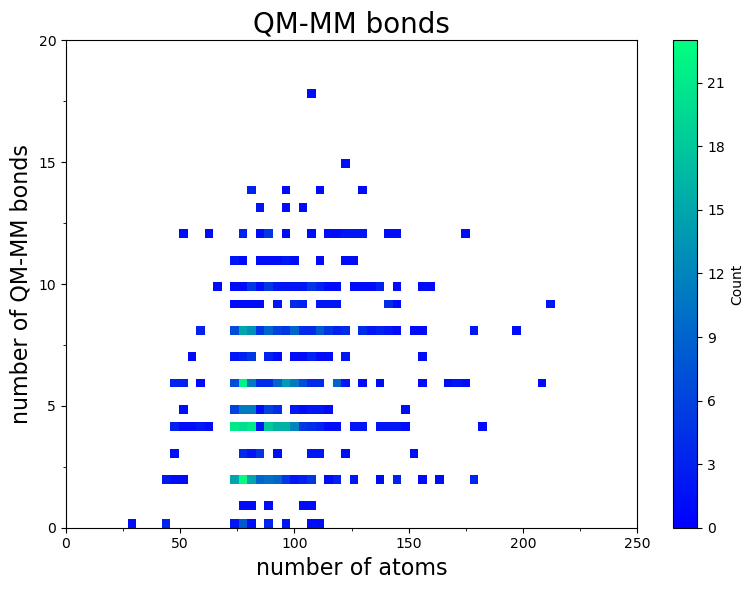

In [9]:
import pandas as pd               # import the data
import seaborn as sns             # data visualization
from collections import Counter   # data countaine (storage)
import matplotlib.pyplot as plt   # plot the data
from matplotlib import pyplot as plt,ticker
import numpy as np                # numerical mathematics
from scipy import stats           # scientific mathematic algorithms

# read file (later dodes will create cvs files directly)
tot_at = []
links = []
cnt = 0
with open("/dicos_ui_home/tlankau/QMMM/Link_Stats_02/stress03.dat") as file:
    for line in file:
      cnt += 1
      line = line.rstrip()
      line = line.split()
      x = int(line[2])
      tot_at.append(x)
      y = int(line[8])
      links.append(y)
    file.close()

# basic stats of the columns
print("Entries:", cnt)
print("Xmin   :", min(tot_at))
print("Xmax   :", max(tot_at))
print("Ymin   :", min(links))
print("Ymax   :", max(links))

# create a dictionary with all data to be plotted
data = {"tot": tot_at, "links": links}

# create a plot to work on
fig, ax = plt.subplots(figsize=(8, 6))

# create a title for the plot
plt.title("QM-MM bonds", size=20)

# define the label of the axes
plt.xlabel('number of atoms',size=16)
plt.ylabel('number of QM-MM bonds' ,size=16)

# define the axises for the plot
ax.set_xlim(0, 250)                                            # range of the x-axis
ax.set_ylim(0,  20)                                            # range of the y-axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=50))    # x-axis major ticks
ax.xaxis.set_minor_locator(ticker.MultipleLocator(base=25))    # x-axis minor ticks
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=5))     # y-axis major ticks
ax.yaxis.set_minor_locator(ticker.MultipleLocator(base=2.5))  # y-axis minor ticks
# ax.grid(True, which='both')

# create histogrm for the density
ax = sns.histplot(x=data['tot'], y=data['links'], bins=50, cmap="winter", cbar=True, element="step", cbar_kws={'label': 'Count'})
cbar = ax.collections[0].colorbar
cbar.locator = ticker.MaxNLocator(integer=True)
cbar.update_ticks()

plt.tight_layout()
# plt.show()
plt.savefig('/dicos_ui_home/tlankau/QMMM/Link_Stats_02/stress03_links.jpg', dpi=400)
